<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_colab_RDKit_no4_%E6%A7%8B%E9%80%A0%E5%A4%89%E6%8F%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1番大きなフラグメントを残して他を除去

rdkit.Chem.MolStandardize.fragment.LargestFragmentChooser()

# 水素の付加

rdkit.Chem.AddHs(mol, addCoords=True)

# 構造最適化

rdkit.AllChem.MMFFOptimizeMolecule(mol)

In [1]:
#rdkitのインストール
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのversionを表示
!python -V

Python 3.7.14


In [4]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.3.5'

In [5]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2022.03.5


# 複数分子の読み込み

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!wget -P /content/drive/MyDrive/data https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson04_RDKit/data/PubChem_TCI_phenol_records.sdf

--2022-10-09 10:07:33--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson04_RDKit/data/PubChem_TCI_phenol_records.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373649 (365K) [text/plain]
Saving to: ‘/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf.7’

PubChem_TCI_phenol_ 100%[===================>] 364.89K  --.-KB/s    in 0.02s   

2022-10-09 10:07:33 (14.9 MB/s) - ‘/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf.7’ saved [373649/373649]



In [8]:
suppl = Chem.SDMolSupplier('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')

In [9]:
mols = [mol for mol in suppl]

In [10]:
len(suppl)

117

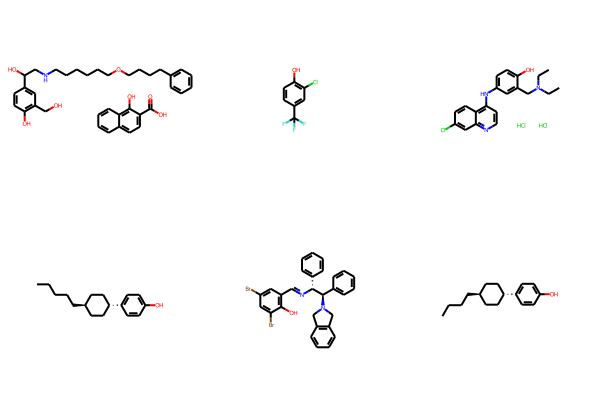

In [11]:
Draw.MolsToGridImage(mols[:6])

# 1番大きなフラグメントを残して他を除去する。

In [12]:
from rdkit.Chem import MolStandardize
lfc = MolStandardize.fragment.LargestFragmentChooser()

In [13]:
#意味は、for文と同じですがリスト内合表記にしています。新しくリストを作る際には、こちらの書き方の方がすっきり書けるのと実行速度が速いです。
mols2 = [lfc.choose(mol) for mol in mols ]

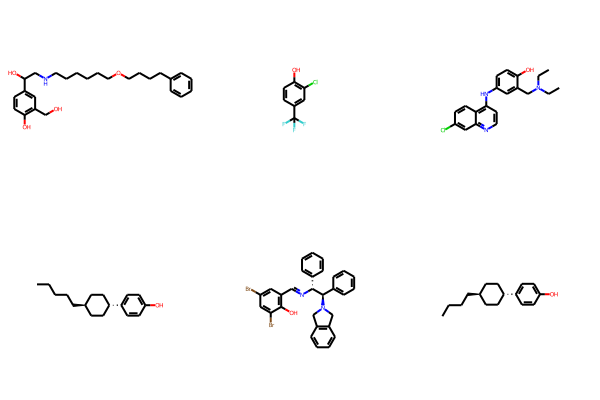

In [14]:
Draw.MolsToGridImage(mols2[:6])

# 水素の付加

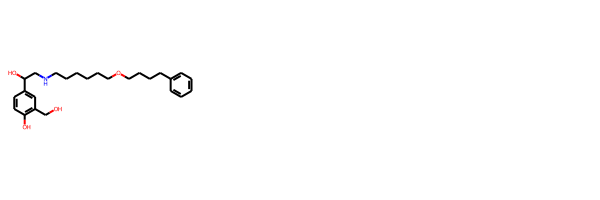

In [15]:
Draw.MolsToGridImage([Chem.AddHs(mols2[0], addCoords=True, explicitOnly=True)])

In [16]:
mols2 = [Chem.AddHs(mol, addCoords=True) for mol in mols2 ]

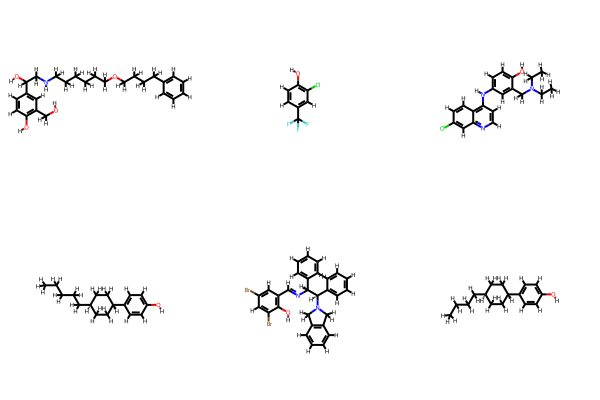

In [17]:
Draw.MolsToGridImage(mols2[:6])

In [18]:
help(Chem.AddHs)

Help on built-in function AddHs in module rdkit.Chem.rdmolops:

AddHs(...)
    AddHs( (Mol)mol [, (bool)explicitOnly=False [, (bool)addCoords=False [, (AtomPairsParameters)onlyOnAtoms=None [, (bool)addResidueInfo=False]]]]) -> Mol :
        Adds hydrogens to the graph of a molecule.
        
          ARGUMENTS:
        
            - mol: the molecule to be modified
        
            - explicitOnly: (optional) if this toggle is set, only explicit Hs will
              be added to the molecule.  Default value is 0 (add implicit and explicit Hs).
        
            - addCoords: (optional) if this toggle is set, The Hs will have 3D coordinates
              set.  Default value is 0 (no 3D coords).
        
            - onlyOnAtoms: (optional) if this sequence is provided, only these atoms will be
              considered to have Hs added to them
        
            - addResidueInfo: (optional) if this is true, add residue info to
              hydrogen atoms (useful for PDB files)

# 構造最適化

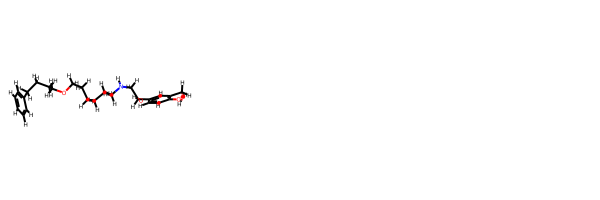

In [19]:
from rdkit.Chem import AllChem
n = 0
#水素の付加
Chem.AddHs(mols2[n], addCoords=True)
# 3次元構造の作成。
AllChem.EmbedMolecule(mols2[n], AllChem.ETKDG())
# MMFFで最適化
AllChem.MMFFOptimizeMoleculeConfs(mols2[n])
# 構造を書き出す
Draw.MolsToGridImage([mols2[n]])

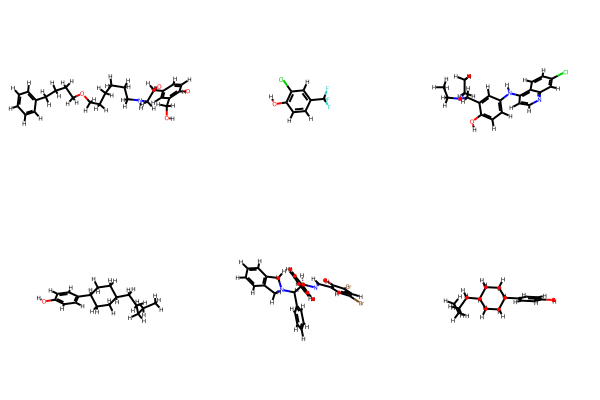

In [20]:
# 一番安定なものを取得するには、配座探索などが必要です。配座探索方法は、様々なものが知られています。ここでは構造最適化の機能紹介だけです。
#以下は、複数分を構造最適化の例です。

from rdkit.Chem import AllChem
import sys

mols3 = []
error_mols = []

for i, mol in enumerate (mols2):
  try:
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.MMFFOptimizeMoleculeConfs(mol)
    mols3.append(mol)
  except:
    print("----error-----")
    print(i)
    print(Chem.MolToSmiles(mol))
    error_mols.append(mol)
    print(sys.exc_info)
  
Draw.MolsToGridImage(mols3[:6])

In [21]:
help(AllChem.MMFFOptimizeMoleculeConfs)

Help on built-in function MMFFOptimizeMoleculeConfs in module rdkit.Chem.rdForceFieldHelpers:

MMFFOptimizeMoleculeConfs(...)
    MMFFOptimizeMoleculeConfs( (Mol)self [, (int)numThreads=1 [, (int)maxIters=200 [, (str)mmffVariant='MMFF94' [, (float)nonBondedThresh=100.0 [, (bool)ignoreInterfragInteractions=True]]]]]) -> object :
        uses MMFF to optimize all of a molecule's conformations
        
         
         ARGUMENTS:
        
            - mol : the molecule of interest
            - numThreads : the number of threads to use, only has an effect if the RDKit
                           was built with thread support (defaults to 1)
                           If set to zero, the max supported by the system will be used.
            - maxIters : the maximum number of iterations (defaults to 200)
            - mmffVariant : "MMFF94" or "MMFF94s"
            - nonBondedThresh : used to exclude long-range non-bonded
                          interactions (defaults to 100.0)
       

In [22]:
help(AllChem.EmbedMolecule)

Help on built-in function EmbedMolecule in module rdkit.Chem.rdDistGeom:

EmbedMolecule(...)
    EmbedMolecule( (Mol)mol [, (int)maxAttempts=0 [, (int)randomSeed=-1 [, (bool)clearConfs=True [, (bool)useRandomCoords=False [, (float)boxSizeMult=2.0 [, (bool)randNegEig=True [, (int)numZeroFail=1 [, (dict)coordMap={} [, (float)forceTol=0.001 [, (bool)ignoreSmoothingFailures=False [, (bool)enforceChirality=True [, (bool)useExpTorsionAnglePrefs=True [, (bool)useBasicKnowledge=True [, (bool)printExpTorsionAngles=False [, (bool)useSmallRingTorsions=False [, (bool)useMacrocycleTorsions=False [, (int)ETversion=1]]]]]]]]]]]]]]]]]) -> int :
        Use distance geometry to obtain initial 
         coordinates for a molecule
        
         
         ARGUMENTS:
        
            - mol : the molecule of interest
            - maxAttempts : the maximum number of attempts to try embedding 
            - randomSeed : provide a seed for the random number generator 
                           so tha

# 参考資料

RDKitによるコンフォマーの生成<br>
https://future-chem.com/rdkit-conformer/